In [4]:
import pandas as pd


In [5]:
df=pd.read_csv("covid_country.csv")

In [6]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [7]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
#extractinf month and year
df.head()

,Date,Country,Confirmed,Recovered,Deaths,year,month
0,2020-01-22,Afghanistan,0,0,0,2020,1
1,2020-01-22,Albania,0,0,0,2020,1
2,2020-01-22,Algeria,0,0,0,2020,1
3,2020-01-22,Andorra,0,0,0,2020,1
4,2020-01-22,Angola,0,0,0,2020,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
 5   year       23688 non-null  int64 
 6   month      23688 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.3+ MB


In [9]:
df.isnull().sum()
#checking if there is a missing value

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
year         0
month        0
dtype: int64

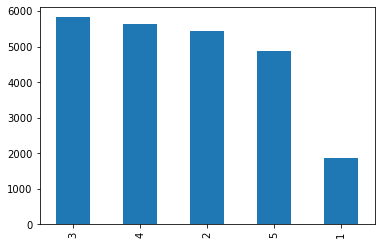

In [10]:
df.month.value_counts().plot(kind = "bar")
#least cases in january

In [11]:
df.year.value_counts()
#we can drop this column as all the cases are in 2020

2020    23688
Name: year, dtype: int64

In [12]:
df.drop("year",axis=1,inplace=True)


In [13]:
df=df.loc[df["Confirmed"]!=0]
#dropping all the countries with zero cases

In [14]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,month
36,2020-01-22,China,548,28,17,1
87,2020-01-22,Japan,2,0,0,1
91,2020-01-22,"Korea, South",1,0,0,1
165,2020-01-22,Taiwan*,1,0,0,1
168,2020-01-22,Thailand,2,0,0,1


In [15]:
corr_matrix=df.corr()
corr_matrix["Deaths"].sort_values(ascending=False)

Deaths       1.000000
Confirmed    0.929064
Recovered    0.775795
month        0.118020
Name: Deaths, dtype: float64

In [16]:
df.drop('Date',axis=1,inplace=True)
df.drop('Country',axis=1,inplace=True)
#dropping the columns which wont affect the death column

In [17]:
df.skew()
#checking skewness

Confirmed    15.219955
Recovered     8.645393
Deaths       11.541737
month        -0.485955
dtype: float64

In [18]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>1.5:
        df[col]=np.log1p(df[col])
#correcting skewness

In [19]:
df.skew()

Confirmed    0.230224
Recovered    0.474602
Deaths       1.059118
month       -0.485955
dtype: float64

In [20]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold=3
df =df[(z < 3).all(axis=1)]
#removing outliers

In [21]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [22]:
x=pd.DataFrame(data=df,columns=["Confirmed","Recovered","month"])

In [23]:
x.shape

(15347, 3)

In [24]:
y=df["Deaths"]


In [25]:
df.head()


,Confirmed,Recovered,Deaths,month
1888,2.564949,1.098612,0.000000,2
1910,0.693147,0.000000,0.000000,2
1912,1.609438,0.000000,0.000000,2
1916,9.383621,5.620401,5.560682,2
1941,0.693147,0.000000,0.000000,2


In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def maxr2_score(clf,x,y):
    max_r_score=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            rs=r_state
    print("maximum r2_score is at random state :",rs," and it is :",max_r_score)

In [33]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
lr_clf=LinearRegression()
maxr2_score(lr_clf,x,y)

maximum r2_score is at random state : 95  and it is : 0.8362318268990683


In [34]:
cross_val_score(lr,x,y,cv=10,scoring="r2").mean()

0.7231509705665207

In [35]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
maxr2_score(dt,x,y)
#same as that of linear regression

maximum r2_score is at random state : 80  and it is : 0.891355962433052


In [ ]:
import joblib
joblib.dump(dt,"covid_19.pkl")